In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math
from twod_object import TwoDObject
from simulation import Simulation
from kalmanfilter2 import KalmanFilter
from palettable.mycarta import Cube1_4
# import array_to_latex as a2l

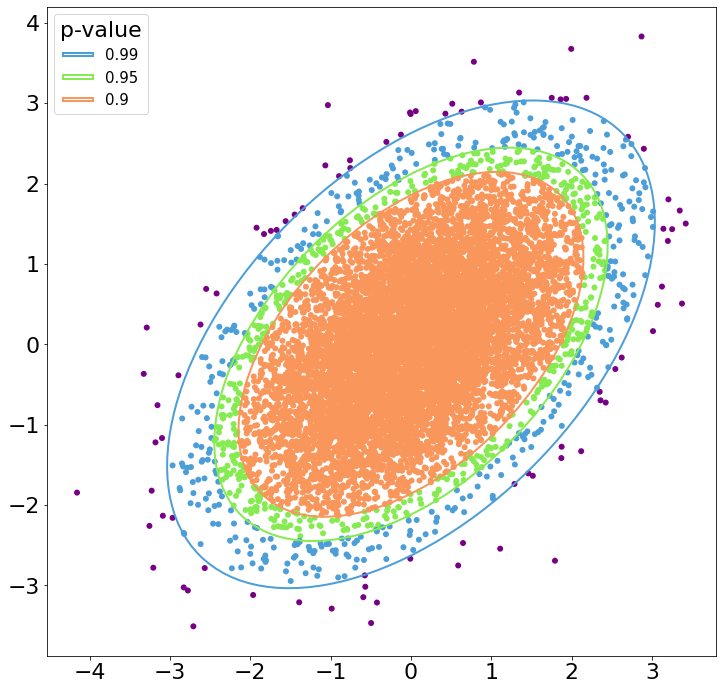

In [2]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize = (12,12))
colors = Cube1_4.mpl_colors
def ellipse(mean, cov, p = [0.99,0.95,0.90]):
    X = np.random.multivariate_normal(mean, cov, 10000 )
    axes=plt.gca()
    axes.set_aspect(1)
    colors_array = np.array([colors[0]] * X.shape[0])
    for i in range(len(p)):
        s = -2 * math.log(1 - p[i])
        w, v = np.linalg.eig(s*cov)
        w = np.sqrt(w)
        ang = math.atan2(v[0,0], v[1,0]) / math.pi * 180
        ellipse = Ellipse(xy=mean, width= 2 * w[0], height= 2 * w[1], angle = ang, edgecolor=colors[i+1], lw=2,fc = "none", label = str(p[i]))
        cos_angle = np.cos(np.radians(180.-ang))
        sin_angle = np.sin(np.radians(180.-ang))

        x_val = (X[:,0] - mean[0]) * cos_angle - (X[:,1] - mean[1]) * sin_angle
        y_val = (X[:,0] - mean[0]) * sin_angle + (X[:,1] - mean[1]) * cos_angle 

        rad_cc = (x_val**2/(w[0])**2) + (y_val**2/(w[1])**2)
        colors_array[np.where(rad_cc <= 1.)[0]] = colors[i+1]

        axes.add_patch(ellipse)
    axes.scatter(X[:,0],X[:,1],c=colors_array,linewidths=0, alpha = 1)
    plt.legend(title = "p-value", loc=2, prop={'size': 15}, handleheight = 0.01)
    plt.show()
mean = (0,0)
cov = np.array([[1, 0.5], [0.5, 1]])
ellipse(mean, cov)


In [3]:
td = TwoDObject([np.array([[1],[1],[1],[1]])], 0.1, 0.1,5, 3, 0)
cov = td.Q[2:,2:]
print(cov)

[[0.1 0. ]
 [0.  5. ]]


In [4]:
sim = Simulation(td, KalmanFilter)

11


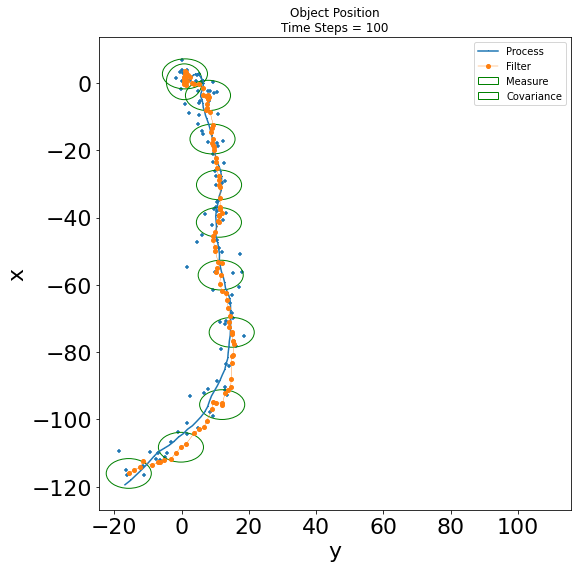

In [5]:

sim.generate(100)
sim.predict()
sim.plot_all(ellipse_freq = 0.1)
